### Analysis Purpose: Uncover the factors that lead to employee attrition. Questions to be answered:
1. Attrition patterns by demographics: How does employee attrition vary across age groups, deparment, education, gender, marital status, job level? Are the differences statistically significant?
2. Attrition patterns by employment history: How does employee attrition vary by working experience, tenure at company, time in role...? Are the differences statistically significant?
3. What are significant factors that make differences between the group that stayed or left? 
4. Which significant factors have the most impacts on likelihood of attrition?
5. Are the significant factors affecting attrition statistically different across different demographic groups (i.e department, job level). Can these insights inform targeted intervention for a specific group?

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd

<ipython-input-1-10ba5bd8c1b4>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import statistical/ ML libraries
%pip install imbalanced-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

In [3]:
# Import visualization libaries
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1. Data Pre-Processing

In [5]:
# Get general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Check if there are any missing values. No missing values found
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Check if there are any duplicates. No duplicates found
df.duplicated().sum()

0

In [8]:
# Summary statistics for each columns
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
# Drop irrelevant columns
df.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], axis=1, inplace=True)

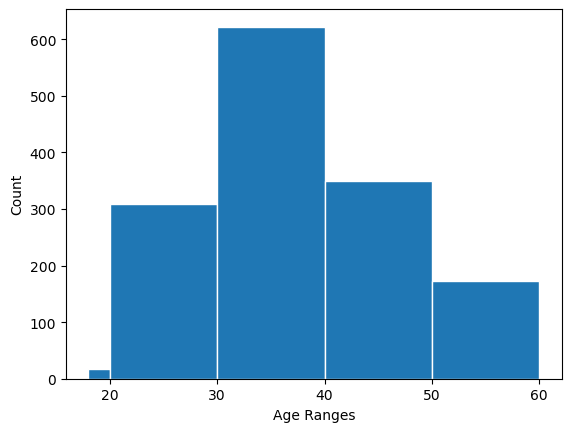

In [10]:
# Divide age into groups for better analysis and visualization
age_groups = [18,20,30,40,50,60]
plt.hist(df['Age'],bins=age_groups, edgecolor='white')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.show()

In [11]:
# Create a new column to feature age groups
def get_age_range(x):
    if x<30:
        return '18-30'
    elif x>=30 and x<40:
        return '30-40'
    elif x>=40 and x<50:
        return '40-50'
    elif x>=50:
        return '50+'
df['Age_Range'] = df['Age'].apply(get_age_range)

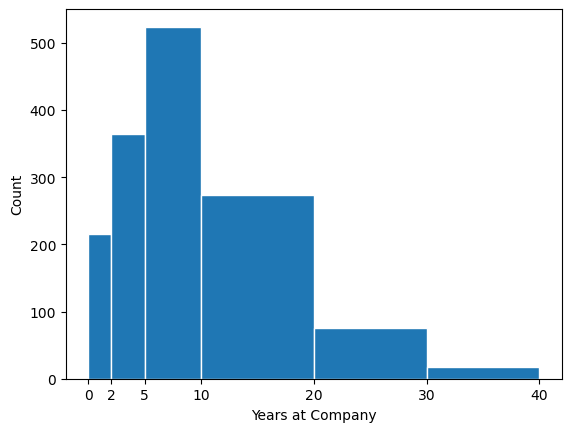

In [12]:
# Divide tenure into groups for better analysis and visualization
tenure_bins = [0,2,5,10,20,30,40]
plt.hist(x=df['YearsAtCompany'], bins=tenure_bins, edgecolor='white')
plt.xlabel('Years at Company')
plt.xticks(tenure_bins)
plt.ylabel('Count')
plt.show()

In [13]:
# Create a new column to feature tenure groups
def get_tenure(x):
    if x>=0 and x<2: 
        return '0-2'
    elif x>=2 and x<5:
        return '2-5'
    elif x>=5 and x<10:
        return '5-10'
    elif x>=10 and x<20:
        return '10-20'
    elif x>=20:
        return '20+'
# Years with Company 
df['YearsAtCompany_Range'] = df['YearsAtCompany'].apply(get_tenure)
# Years in current role:
df['YearsInCurrentRole_Range'] = df['YearsInCurrentRole'].apply(get_tenure)
# Years since last promotion:
df['YearsSinceLastPromotion_Range'] = df['YearsSinceLastPromotion'].apply(get_tenure)
# Years with current manager:
df['YearsWithCurrManager_Range'] = df['YearsWithCurrManager'].apply(get_tenure)
# Total working years:
df['TotalWorkingYears_Range'] = df['TotalWorkingYears'].apply(get_tenure)

In [14]:
# Total worked companies:
bins = [0, 3, 5, 10]
df['NumCompaniesWorked_Range'] = pd.cut(df['NumCompaniesWorked'], bins=bins, labels=['1-3', '4-5', '6-10'])

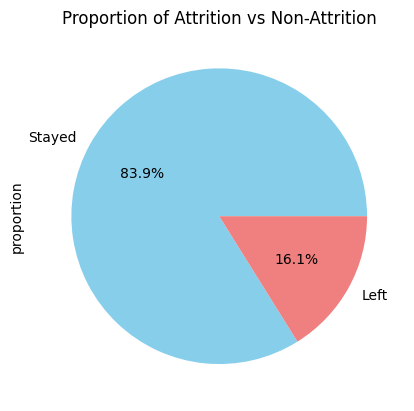

In [15]:
# Compare proportion of non-attrition vs attrition
df['Attrition'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', labels=['Stayed', 'Left'], colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Attrition vs Non-Attrition')
plt.xlabel('')
plt.show()

#### Observations: the dataset is imbalanced where non-attrition data accounts for mostly 84% of the dataset

### 2. Exploratory Data Analysis

In [16]:
# Split data into different categories by features for easier analysis and visualization
# Demographic features
demo_features = ['Department', 'Age_Range', 'JobLevel', 'Education', 'Gender', 'MaritalStatus']
# Employment-history features
employment_features = ['NumCompaniesWorked_Range', 'TotalWorkingYears_Range', 'YearsAtCompany_Range', 'YearsInCurrentRole_Range', 'YearsWithCurrManager_Range']
# Job-related features
job_features = ['BusinessTravel', 'JobInvolvement', 'JobSatisfaction', 'OverTime', 'PeformanceRating', 'TrainingTimesLastYear', 'YearsSinceLastPromotion_Range', 'DistanceFromHome']
# Compensation-related features
comp_features = ['HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'StockOptionLevel']
# Culture-related features
culture_features = ['RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']

In [17]:
# Split data into attrition and non-attrition groups to compare differences between 2 groups
df_non_attrition = df[df['Attrition']=='No']
df_attrition = df[df['Attrition']=='Yes']

#### Categorical variables 

In [18]:
# Create general function to get attrition data by a specific categorical group
def get_data(feature, target_variable, normalize=True):
    data = df.groupby(feature, observed=False)[target_variable].value_counts(normalize).to_frame().reset_index()
    data = data.pivot(index=feature, columns=target_variable, values='proportion' if normalize else'count')
    return data

In [19]:
# Create general function to plot attrition data by a specific categorical group
def plot_bar(data, ax):
    data.plot(kind='bar', ax=ax, stacked=True, title=f'Attrition Rate by {data.index.name}', rot=0, color=['skyblue', 'lightcoral'])
    ax.legend(loc='lower right', labels=['Stayed', 'Left'])
    ax.set_ylabel('Proportion of Attrition')

In [20]:
# Create a general function to test statistically significant difference in attrition between specific categorical groups (using chi-square test)
from scipy.stats import chi2_contingency

def get_chi2_result(feature, target_variable, alpha=0.05):
    count_data = get_data(feature, target_variable, normalize=False).fillna(0).to_numpy()
    stat, p, dof, expected = chi2_contingency(count_data)
    if p <= alpha:
        print(f'Feature {feature}: statistically significant (p-value: {p})')
    else:
        print(f'Feature {feature}: NOT statistically significant (p-value: {p})')

#### Continuous variables

In [21]:
# Create general function to visualize continuous features between attrition and non-attrition group
def plot_kde(feature, ax):
    sns.kdeplot(df_non_attrition, x=feature, color='blue', ax=ax)
    sns.kdeplot(df_attrition, x=feature, color='coral', ax=ax)
    ax.legend(labels=['Stayed', 'Left'], loc='upper right')

In [22]:
# Create a general function to test statistically significant difference in a sepecific continuous feature between attrition and non-attrition group (using ANOVA test)
from scipy.stats import f_oneway

def get_anova_result(feature, alpha=0.05):
    group1 = df_non_attrition[feature].to_numpy()
    group2 = df_attrition[feature].to_numpy()
    f_statistic, p = f_oneway(group1, group2)
    if p <= alpha:
        print(f'Feature {feature}: statistically significant (p-value: {p})')
    else:
         print(f'Feature {feature}: NOT statistically significant (p-value: {p})')

#### 2.1 Attrition pattern by demographic groups

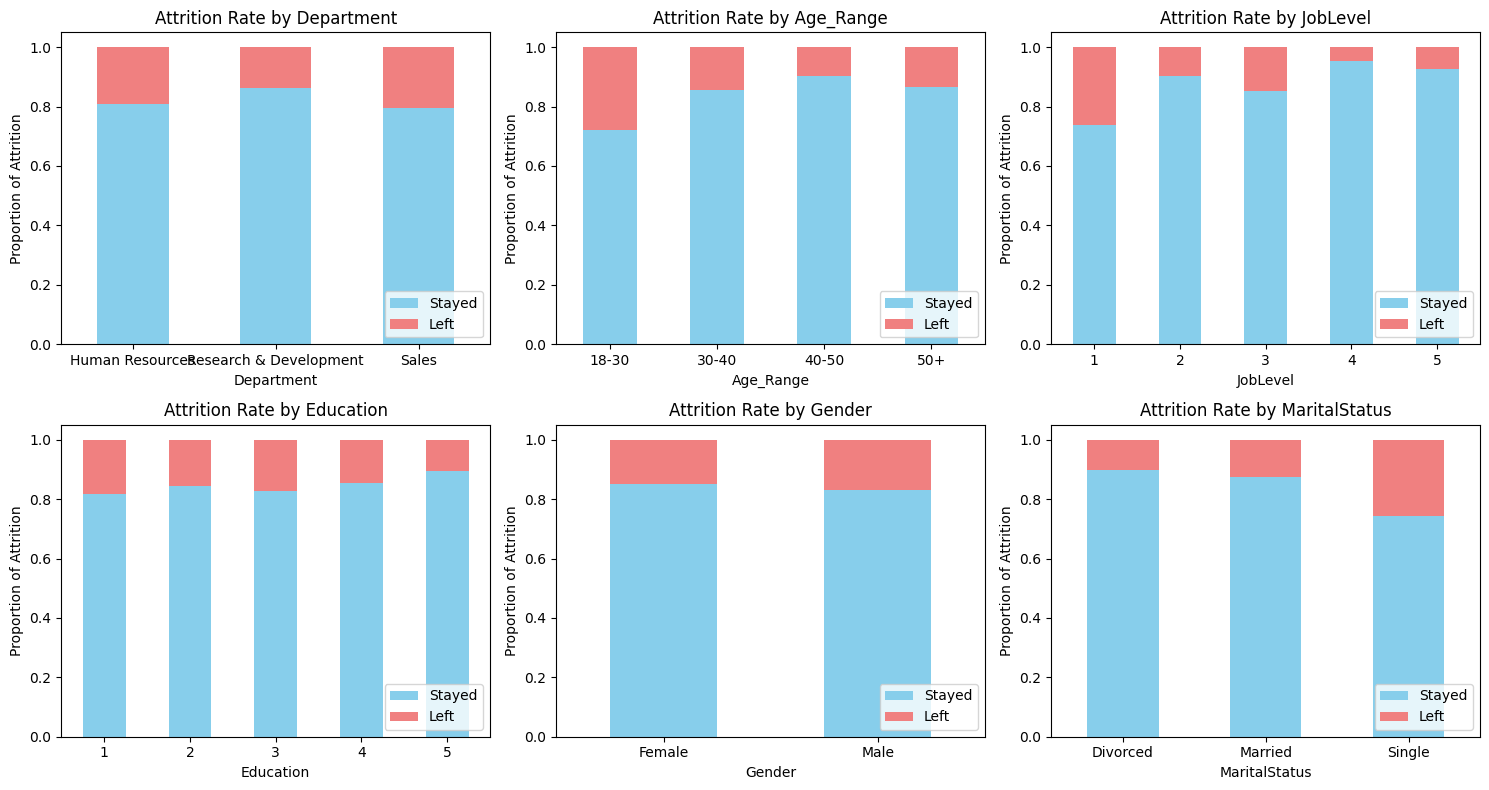

In [23]:
# Get attrition data by demographic groups
demo_features = ['Department', 'Age_Range', 'JobLevel', 'Education', 'Gender', 'MaritalStatus']
demo_datasets = []
for feature in demo_features:
    data = get_data(feature, target_variable='Attrition')
    demo_datasets.append(data)
# Visualize attrition patterns by demographic groups
position = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

fig, ax = plt.subplots(2,3, figsize=(15,8))
for i, data in enumerate(demo_datasets):
    plot_bar(data, ax[position[i][0], position[i][1]])

plt.tight_layout()
plt.show()

In [25]:
# Check if there is statistically significant difference in attrition between demographic groups
for feature in demo_features:
    get_chi2_result(feature, target_variable='Attrition')

Feature Department: statistically significant (p-value: 0.004525606574479633)
Feature Age_Range: statistically significant (p-value: 4.3094182077647615e-10)
Feature JobLevel: statistically significant (p-value: 6.634684715458957e-15)
Feature Education: NOT statistically significant (p-value: 0.5455253376565949)
Feature Gender: NOT statistically significant (p-value: 0.29057244902890855)
Feature MaritalStatus: statistically significant (p-value: 9.45551106034083e-11)


#### Observations:
1. There are no significant differences in attrition rate between gender and education level
2. There are statistically significant differences in attrition rate between:
   - Departments: Research & Development has the lowest attrition
   - Age groups: Group of 18-30 has the highest attrition.
   - Job Level: Job level 1 has the highest attrition.
   - Marital status: Single group has higher attrition compared to married and divorced groups.

#### 2.2. Attrition patterns by employment history

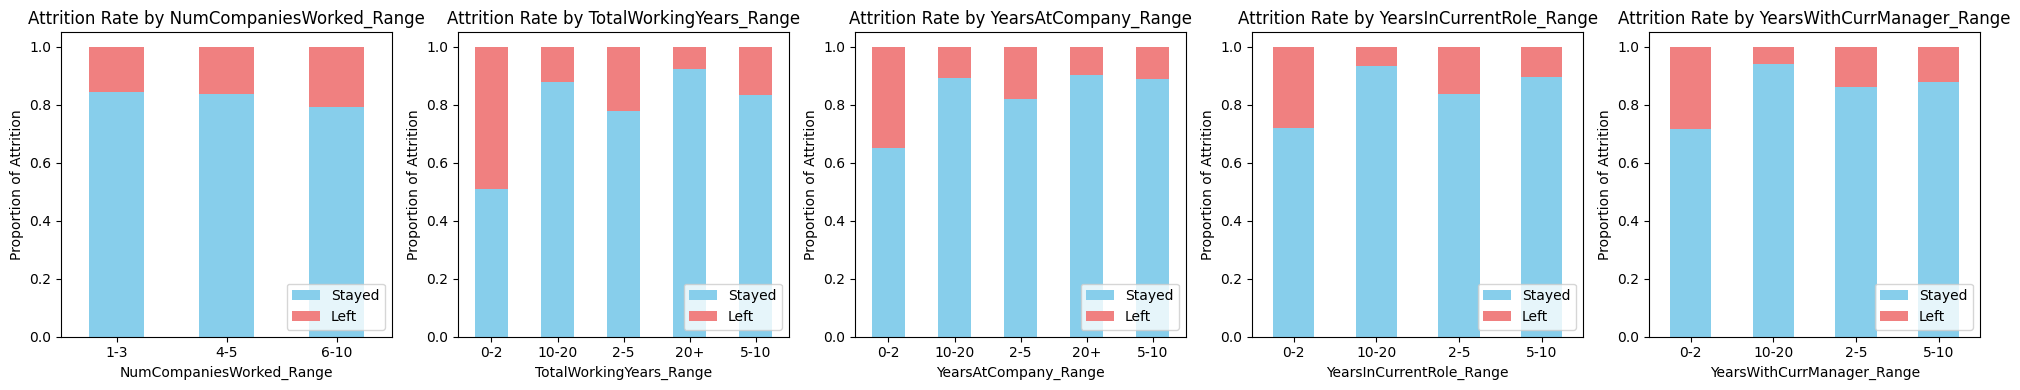

In [26]:
# Get attrition data by employment history groups
employment_features = ['NumCompaniesWorked_Range', 'TotalWorkingYears_Range', 'YearsAtCompany_Range', 'YearsInCurrentRole_Range', 'YearsWithCurrManager_Range']
employment_datasets = []
for feature in employment_features:
    data = get_data(feature, target_variable='Attrition')
    employment_datasets.append(data)

# Visualize attrition patterns
fig, ax = plt.subplots(1,5, figsize=(20,4))

for i, data in enumerate(employment_datasets):
    plot_bar(data, ax[i])

plt.tight_layout() 
plt.show()

In [27]:
# Check if there is statistically significant difference in attrition between employment history groups
for feature in employment_features:
    get_chi2_result(feature, target_variable='Attrition')

Feature NumCompaniesWorked_Range: NOT statistically significant (p-value: 0.17183563259735316)
Feature TotalWorkingYears_Range: statistically significant (p-value: 8.3706058120729e-20)
Feature YearsAtCompany_Range: statistically significant (p-value: 1.3125686680410335e-15)
Feature YearsInCurrentRole_Range: statistically significant (p-value: 1.2941205675319517e-10)
Feature YearsWithCurrManager_Range: statistically significant (p-value: 2.6875079249014773e-11)


#### Observations:
- Employees who have worked for many companies (>6) might have higher tendency to switch jobs, making them more prone to attrition. However the difference is not statistically significant
- Similar patterns in attrition based on total working years, years at company, years in current role, years with current manager. Junior employees with <2 years of total working experience, tenure at company, in current role and with current manager tend to have higher attrition than more senior employees. This difference is statistically significant. This suggests that the first 2 years in company, in a specific role or with a specific manager is crucial in employee retention. More intensive employee support during the first 2 years should be considered

#### 2.3. Factors that are statistically different between non-attrition and attrition groups

##### 2.3.1 Difference in job-related factors between non-attrition and attrition groups

In [28]:
# Job-related features
job_features = ['BusinessTravel', 'JobInvolvement', 'JobSatisfaction', 'OverTime', 'PeformanceRating', 'TrainingTimesLastYear', 'YearsSinceLastPromotion_Range', 'DistanceFromHome']
# Split categorical vs continuous features
job_features_categorical = ['BusinessTravel', 'JobInvolvement', 'JobSatisfaction', 'OverTime', 'YearsSinceLastPromotion_Range', 'PerformanceRating']
job_features_continuous = [ 'TrainingTimesLastYear', 'DistanceFromHome']

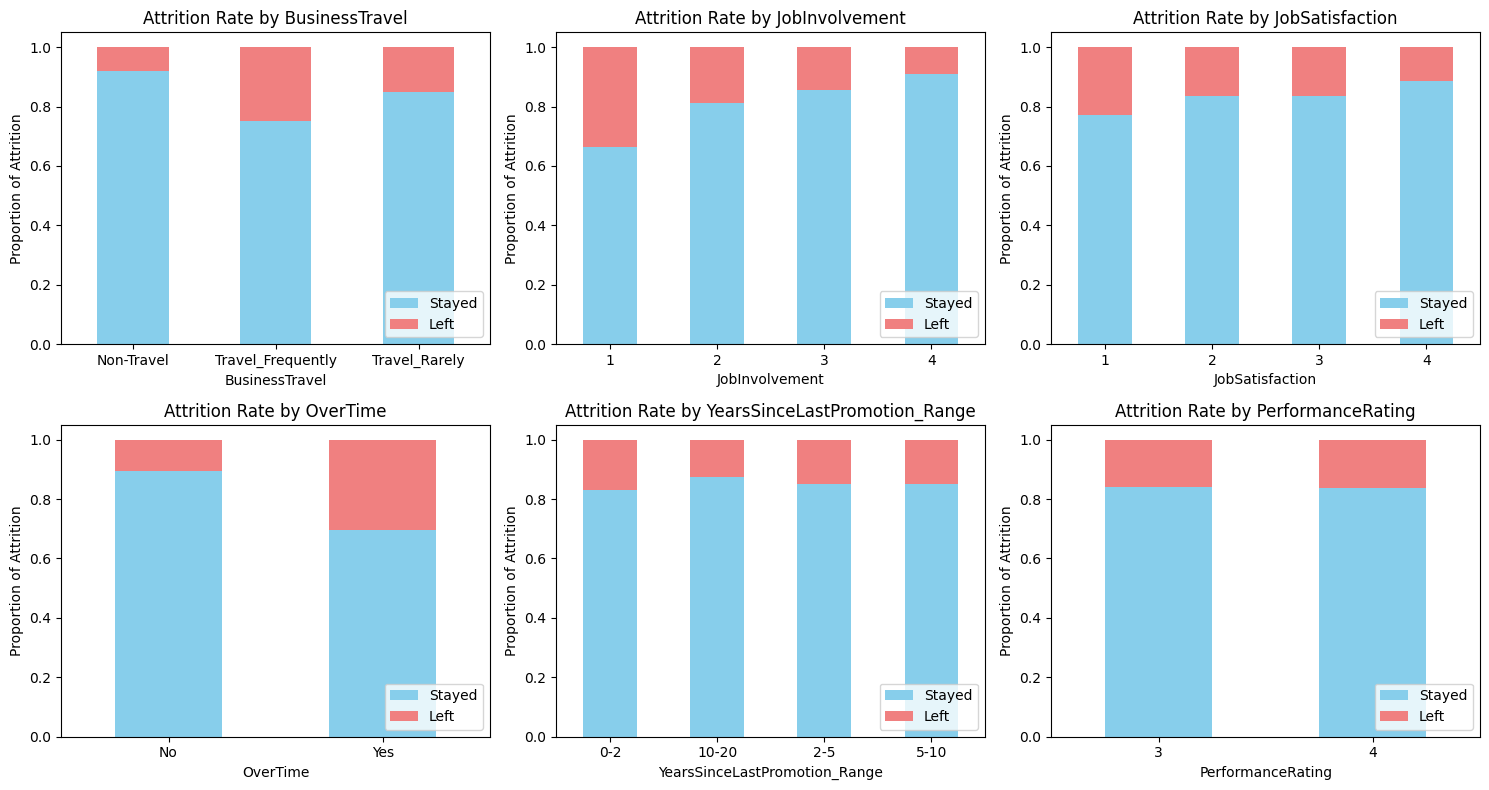

In [29]:
# Get attrition data by job-related categorical features
job_datasets = []
for feature in job_features_categorical:
    data = get_data(feature, target_variable='Attrition')
    job_datasets.append(data)

# Visualize attrition data
fig, ax = plt.subplots(2,3, figsize=(15,8))
position = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
for i, data in enumerate(job_datasets):
    plot_bar(data, ax[position[i][0], position[i][1]])

plt.tight_layout()
plt.show()

In [30]:
# Check if there is statistically significant difference in job-related features between attrition and non-attrition group
for feature in job_features_categorical:
    get_chi2_result(feature, target_variable='Attrition')

Feature BusinessTravel: statistically significant (p-value: 5.608614476449931e-06)
Feature JobInvolvement: statistically significant (p-value: 2.8631806367134195e-06)
Feature JobSatisfaction: statistically significant (p-value: 0.0005563004510387556)
Feature OverTime: statistically significant (p-value: 8.15842372153832e-21)
Feature YearsSinceLastPromotion_Range: NOT statistically significant (p-value: 0.6580299645210077)
Feature PerformanceRating: NOT statistically significant (p-value: 0.9900745465934576)


#### Observations: 
- Employees group who travel frequently has higher attrition compared to non-travel and travel-rarely groups
- Employees with low level of job-involvement and job satisfaction (level 1) are more likely to leave
- Overtime employee group have higher attrition than non-overtime group
- No significant difference in years since last promotion and performance rating between attrition and non-attrition group

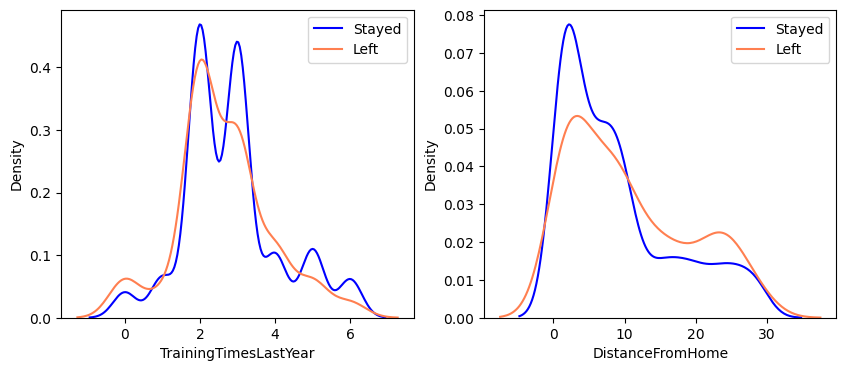

In [31]:
# Get attrition data by job-related continuous features
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i, feature in enumerate(job_features_continuous):
    plot_kde(feature, ax[i])

plt.show()

In [32]:
# Check if there is statistically significant difference in distance from home between attrition and non-attrition group
for feature in job_features_continuous:
    get_anova_result(feature)

Feature TrainingTimesLastYear: statistically significant (p-value: 0.02257849973719727)
Feature DistanceFromHome: statistically significant (p-value: 0.0027930600802132115)


#### Observations: 
- Most employees receive 2-4 training hours last year. Employees receiving <1 training hours are more likely to leave.
- Most employees have distance from home in range <10km. The likelihood of employees leaving when distance from home > 10km is greater than likelihood of employee staying

##### 2.3.2. Difference in compensation & benefits-related factors between non-attrition and attrition groups

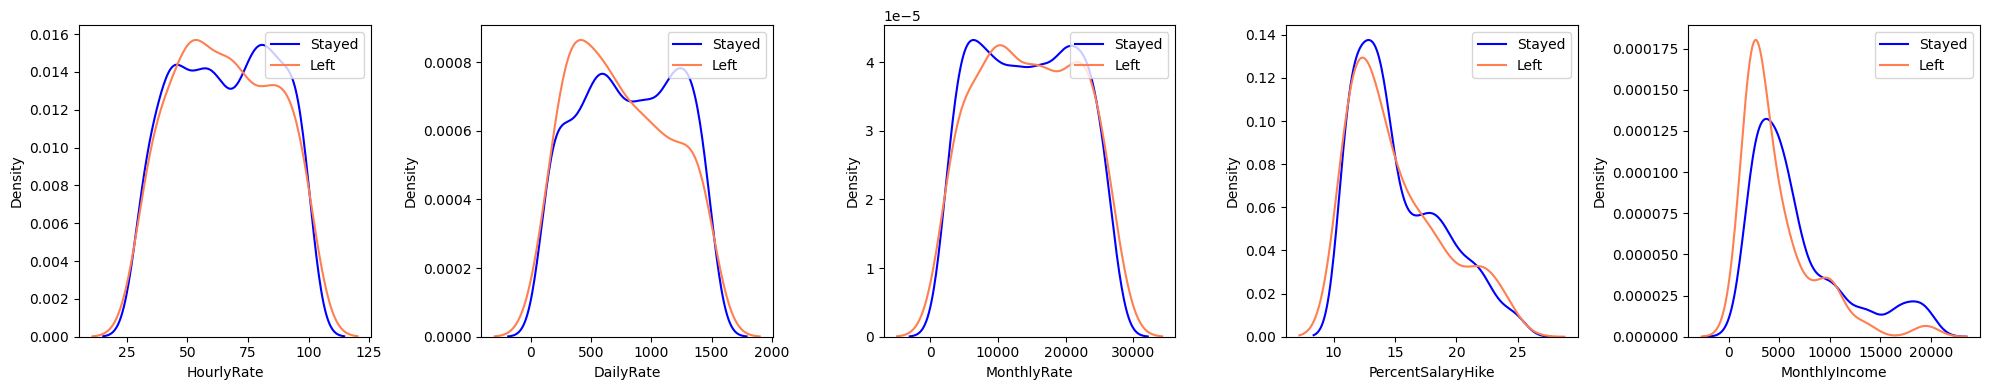

In [33]:
# Compensation-related features
compensation_features = ['HourlyRate', 'DailyRate', 'MonthlyRate', 'PercentSalaryHike', 'MonthlyIncome']
fig, ax = plt.subplots(1,5, figsize=(20,4))
for i, feature in enumerate(compensation_features):
    plot_kde(feature, ax[i])

plt.tight_layout()
plt.show()

In [34]:
# Check if there is statistically significant difference in compensation features between attrition and non-attrition group
for feature in compensation_features:
    get_anova_result(feature)

Feature HourlyRate: NOT statistically significant (p-value: 0.7931347689944519)
Feature DailyRate: statistically significant (p-value: 0.02985816066026101)
Feature MonthlyRate: NOT statistically significant (p-value: 0.5611235982243229)
Feature PercentSalaryHike: NOT statistically significant (p-value: 0.6056128238894396)
Feature MonthlyIncome: statistically significant (p-value: 7.147363985353002e-10)


#### Observations:
- Hourly rate, monthly rate and percent salary hike distribution looks similar between non-attrition and attrition groups hence there is no association between attrition and these features.
- Employees with daily rate in lower end of the range (<500) is more likely to leave compared to those in higher range (1000-1500)
- Most employees have monthly income in lower end of the range (<5000). The likelihood of employees staying when monthly income is in higher range (>10000) is greater than likelihood of employees leaving.

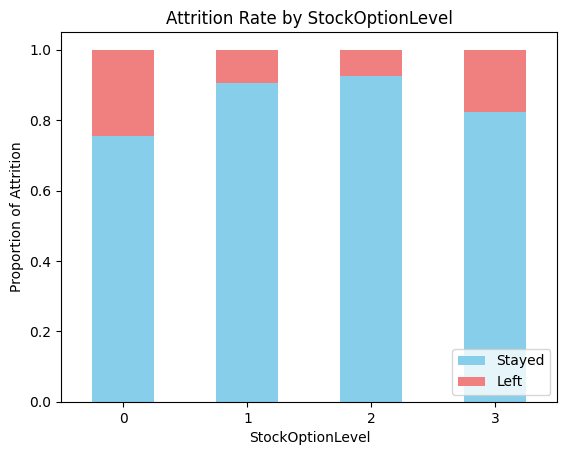

In [35]:
# Benefits related features
stock_data = get_data('StockOptionLevel', target_variable='Attrition')
fig, ax = plt.subplots()
plot_bar(stock_data, ax)
plt.show()

In [36]:
get_chi2_result('StockOptionLevel', target_variable='Attrition')

Feature StockOptionLevel: statistically significant (p-value: 4.379390336108354e-13)


#### Observations: 
- Employees with low stock option (level 0) are more likely to leave

#### 2.3.3. Difference in culture & environment-related factors between non-attrition and attrition groups

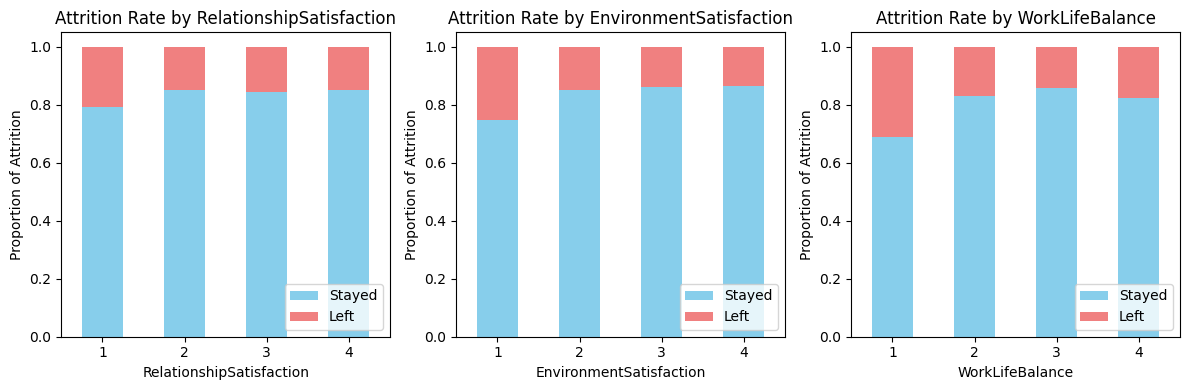

In [37]:
culture_features = ['RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']

fig, ax = plt.subplots(1,3, figsize=(12,4))
for i, feature in enumerate(culture_features):
    data = get_data(feature, target_variable='Attrition')
    plot_bar(data, ax[i])

plt.tight_layout()
plt.show()

In [38]:
# Check if there is statistically significant difference in culture features between attrition and non-attrition group
for feature in culture_features:
    get_chi2_result(feature, target_variable='Attrition')

Feature RelationshipSatisfaction: NOT statistically significant (p-value: 0.15497244371052638)
Feature EnvironmentSatisfaction: statistically significant (p-value: 5.1234689062894205e-05)
Feature WorkLifeBalance: statistically significant (p-value: 0.0009725698845348824)


#### Observations
- Employee groups with low environment satisfaction and worklife balance (level 1) are more likely to leave
- No statistically significant difference in relationship satisfaction between attrition and non-attrition group

#### Conclusion:
There are statistically differences in total 11 features between attrition and non-attrition group:
- Job-related features: business travel, job involvement, job satisfaction, overtime, training time last year, distance from home
- Compensation & benefit features: daily rate, monthly income, stock option level
- Culture-related features: environment satisfaction, worklife balance

## 3. Predictive Analytics

#### 3.1 What features have the most important impacts on the likelihood of attrition?

In [39]:
# List all significant features as identified above
significant_features = ['BusinessTravel', 'JobSatisfaction', 'JobInvolvement','OverTime', 'TrainingTimesLastYear', 'DistanceFromHome', 
                        'DailyRate', 'MonthlyIncome', 'StockOptionLevel',
                        'EnvironmentSatisfaction', 'WorkLifeBalance']
# Encode categorical columns
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

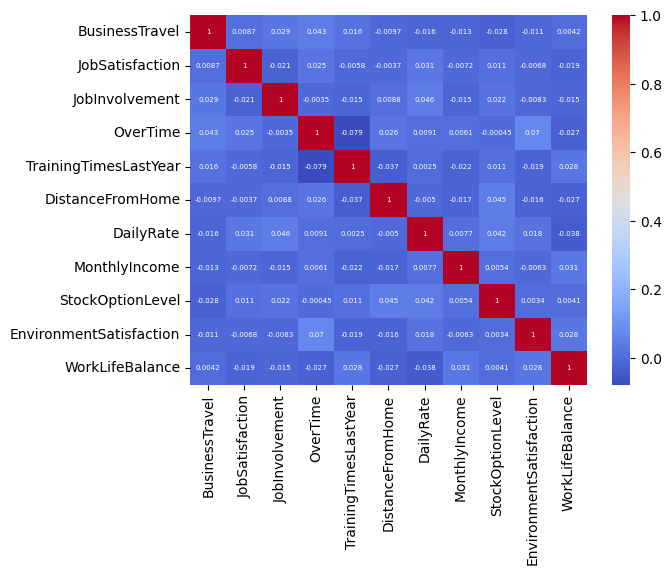

<Figure size 3000x3000 with 0 Axes>

In [40]:
# Get correlation matrix
corr_matrix = df[significant_features].corr()
# Visualize correlation matrix with heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 5})
plt.figure(figsize=(30,30))
plt.show()

In [41]:
# Create a general function to pre-process independent variables
def preprocess_features(features, oversample, scaler):
    X = df[features]
    y = df['Attrition']
    # Transform data
    X = scaler().fit_transform(X)
    y = LabelEncoder().fit_transform(y)
    # Split data into training vs testing sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    # Oversampling to minimize imbalanced class issue
    resample = oversample(random_state=42)
    train_X_resampled, train_y_resampled = resample.fit_resample(train_X, train_y)
    return train_X_resampled, test_X, train_y_resampled, test_y

In [42]:
# Preprocess significant features
train_X_resampled, test_X, train_y_resampled, test_y = preprocess_features(significant_features, ADASYN, MinMaxScaler)

In [43]:
model = LogisticRegression()
model.fit(train_X_resampled, train_y_resampled)
# Make predictions
yhat = model.predict(test_X)
# Print results
print(classification_report(test_y, yhat))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       380
           1       0.35      0.74      0.48        61

    accuracy                           0.78       441
   macro avg       0.65      0.76      0.67       441
weighted avg       0.87      0.78      0.81       441



### Observations
Since accurately identifying individuals with a high risk of leaving is crucial, the recall for class 1 (high-risk attrition) is the most important metric. The Logistic Regression model has 74% correct prediction for attrition cases

In [44]:
# Identify impacts of features
# Get coefficient for each feature
coef_list = (model.coef_)[0]
odds_ratio = np.exp(coef_list)
odds_change = odds_ratio - 1
pd.DataFrame({'Feature': significant_features, 'Odds Ratio': odds_ratio, 'Odds Change': odds_change}).sort_values(by='Odds Change')

,Feature,Odds Ratio,Odds Change
7,MonthlyIncome,0.076004,-0.923996
8,StockOptionLevel,0.170792,-0.829208
2,JobInvolvement,0.229828,-0.770172
9,EnvironmentSatisfaction,0.378630,-0.621370
1,JobSatisfaction,0.399885,-0.600115
10,WorkLifeBalance,0.410199,-0.589801
4,TrainingTimesLastYear,0.476148,-0.523852
6,DailyRate,0.993276,-0.006724
5,DistanceFromHome,1.429738,0.429738
0,BusinessTravel,3.519190,2.519190


In [45]:
# Measure change in model accuracy when a feature value is randomly shuffled. The larger the drop in model accuracy, the more important the feature is
from sklearn.inspection import permutation_importance
result = permutation_importance(model, test_X, test_y, n_repeats=10, random_state=42)
mean_results = list(result.importances_mean)
pd.DataFrame({'Feature': significant_features, 'Drop in model accuracy': mean_results}).sort_values(by='Drop in model accuracy')

,Feature,Drop in model accuracy
6,DailyRate,0.000000
5,DistanceFromHome,0.008844
4,TrainingTimesLastYear,0.008844
10,WorkLifeBalance,0.009297
9,EnvironmentSatisfaction,0.017234
0,BusinessTravel,0.017914
1,JobSatisfaction,0.019955
2,JobInvolvement,0.025397
8,StockOptionLevel,0.037868
7,MonthlyIncome,0.045578


#### Observations
Overtime and benefits related factors are most important in predicting likelihood of attrition, followed by job and culture related factors (Monthly income feature needs to be further analyzed by different job level):
- Overtime group has 254% more odds of leaving the non-overtime group
- Increase of 1 level in stock option for employee is associated with 82% less odds of the employee leaving
- Increase of 1 level in job involvement for employee is associated with 77% less odds of the employee leaving
- Increase of 1 level in environment satisfaction for employee is associated with 62% less odds of the employee leaving
- Increase of 1 level in job satisfaction for employee is associated with 60% less odds of the employee leaving

#### 3.2 Are the most important factors statistically different between demographic groups (i.e department, job-level...)

In [47]:
# Split significant featurs in to continuous and categorical
significant_features_cont = ['TrainingTimesLastYear','DistanceFromHome','DailyRate','MonthlyIncome']
significant_features_cat = [feature for feature in significant_features if feature not in significant_features_cont]

#### By Job Level

In [48]:
# What categorical features are significant differently between job level
for feature in significant_features_cat:
    get_chi2_result(feature, 'JobLevel')

Feature BusinessTravel: NOT statistically significant (p-value: 0.4440652892556828)
Feature JobSatisfaction: NOT statistically significant (p-value: 0.9027142867098723)
Feature JobInvolvement: NOT statistically significant (p-value: 0.5223780644303151)
Feature OverTime: NOT statistically significant (p-value: 0.9223200228397532)
Feature StockOptionLevel: statistically significant (p-value: 0.0008844321122010748)
Feature EnvironmentSatisfaction: NOT statistically significant (p-value: 0.48651300058126157)
Feature WorkLifeBalance: NOT statistically significant (p-value: 0.8322698191065749)


In [49]:
# What continuous features are significant differently between job level
def get_anova_result_joblevel(feature, alpha=0.05):
    group1 = df[df['JobLevel']==1][feature].to_numpy()
    group2 = df[df['JobLevel']==2][feature].to_numpy()
    group3 = df[df['JobLevel']==3][feature].to_numpy()
    group4 = df[df['JobLevel']==4][feature].to_numpy()
    group5 = df[df['JobLevel']==5][feature].to_numpy()
    f_statistic, p = f_oneway(group1, group2, group3, group4, group5)
    if p <= alpha:
        print(f'Feature {feature}: statistically significant (p-value: {p})')
    else:
         print(f'Feature {feature}: NOT statistically significant (p-value: {p})')

In [50]:
for feature in significant_features_cont:
    get_anova_result_joblevel(feature)

Feature TrainingTimesLastYear: NOT statistically significant (p-value: 0.38096207643138447)
Feature DistanceFromHome: statistically significant (p-value: 0.0034795986687676415)
Feature DailyRate: NOT statistically significant (p-value: 0.7675598342817807)
Feature MonthlyIncome: statistically significant (p-value: 0.0)


In [51]:
# Visualize 3 features that are significant differences between job level: StockOptionLevel, DistanceFromHome, MonthlyIncome 
def plot_box(feature, by, ax1, ax2):
    df_attrition.boxplot(column=feature, by=by, ax=ax1)
    df_non_attrition.boxplot(column=feature, by=by, ax=ax2)
    ax1.set_title(f'{feature} of attrition group')
    ax2.set_title(f'{feature} of non-attrition group')
    plt.tight_layout()
    plt.show()

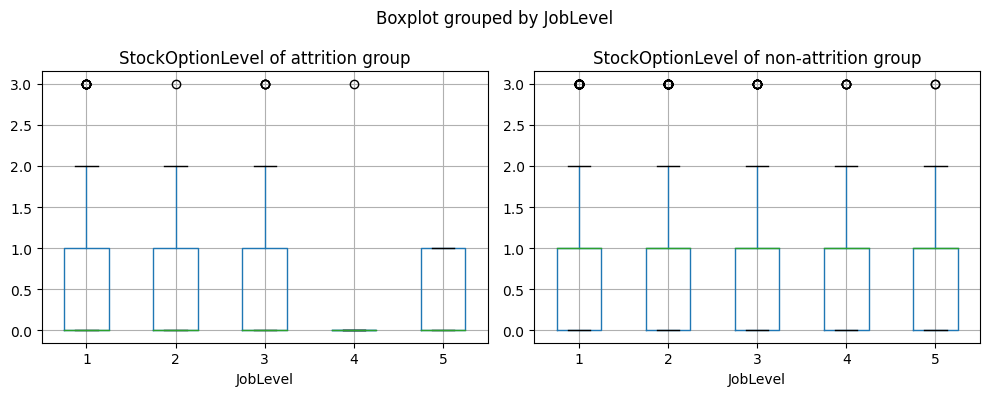

In [52]:
# Stock Option Level
fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_box('StockOptionLevel', by='JobLevel', ax1=ax[0], ax2=ax[1])

#### Observations: 
- Attrition group has lower median stock option level (level 0) across all job levels compared to median level 1 of non-attrition group.
- Nearly all employees in job level 4 who left had no stock option (level 0).
- For job level 5, the non-attrition group has maximum stock option level 3 while attrition group maxed out at just level 1.
- This all indicates a significant difference in stock option between those who stayed and those who left across all job level. Consider reviewing stock option for employees across all job level, especially job level 4 and 5 and for hi-po talents to reduce retention risk

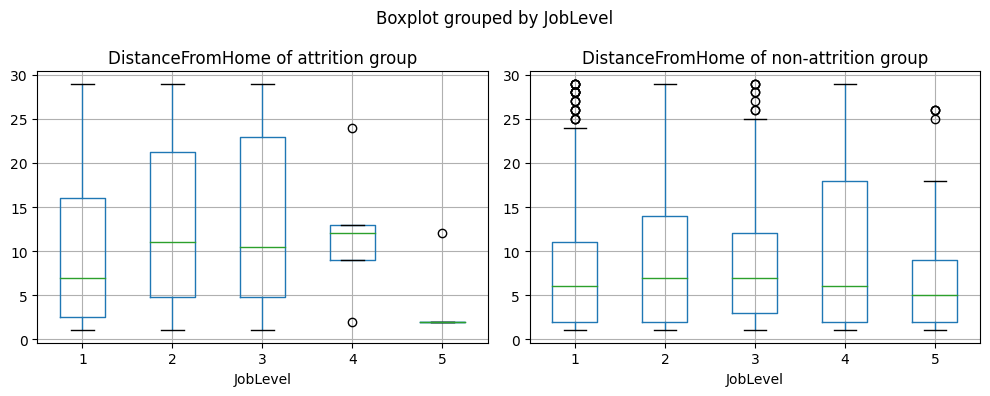

In [53]:
# Distance From Home
fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_box('DistanceFromHome', by='JobLevel', ax1=ax[0], ax2=ax[1])                

#### Observations:
- The median distance from home of attrition group is on average > 10km across almost all job levels, which is higher than non-attrition group.
- This suggest that employees who live farther from workplace are more likely to leave. This patterns are similar across almost all job levels. Consider some flexible working arrangements or commuting assistance especially for employees who live farther from the office (>10 km)

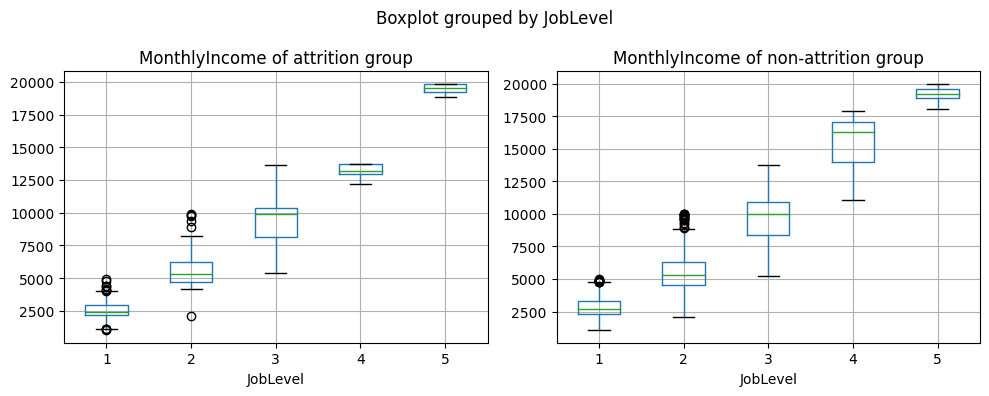

In [54]:
# Monthly Income
fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_box('MonthlyIncome', by='JobLevel', ax1=ax[0], ax2=ax[1])

#### Observations:
- Higher job level has higher monthly income range, which is expected.
- In general, median income per month is similar between attrition and non-attrition group across job levels, except job level 4 where attrition group has lower median income (14,000) than non-attrition group (17,000). Consider reviewing monthly salary of job level 4, especially for hi-po talents to reduce retention risk and ensure internal equity

### By Department

In [55]:
# What categorical features are significant differently between department
for feature in significant_features_cat:
    get_chi2_result(feature, 'Department')

Feature BusinessTravel: NOT statistically significant (p-value: 0.9952355123278379)
Feature JobSatisfaction: NOT statistically significant (p-value: 0.2018967848414833)
Feature JobInvolvement: NOT statistically significant (p-value: 0.677967056756894)
Feature OverTime: NOT statistically significant (p-value: 0.9542750851354225)
Feature StockOptionLevel: NOT statistically significant (p-value: 0.6358095034633433)
Feature EnvironmentSatisfaction: NOT statistically significant (p-value: 0.32684009274494286)
Feature WorkLifeBalance: NOT statistically significant (p-value: 0.05159032627022347)


In [56]:
# What continuous features are significant differently between job level
def get_anova_result_dept(feature, alpha=0.05):
    group1 = df[df['Department']=='Research & Development'][feature].to_numpy()
    group2 = df[df['Department']=='Sales'][feature].to_numpy()
    group3 = df[df['Department']=='Human Resources'][feature].to_numpy()
    f_statistic, p = f_oneway(group1, group2, group3)
    if p <= alpha:
        print(f'Feature {feature}: statistically significant (p-value: {p})')
    else:
         print(f'Feature {feature}: NOT statistically significant (p-value: {p})')

In [57]:
for feature in significant_features_cont:
    get_anova_result_dept(feature)

Feature TrainingTimesLastYear: NOT statistically significant (p-value: 0.23475707161651302)
Feature DistanceFromHome: NOT statistically significant (p-value: 0.7905795728217966)
Feature DailyRate: NOT statistically significant (p-value: 0.5686345718513953)
Feature MonthlyIncome: statistically significant (p-value: 0.04097409724987449)


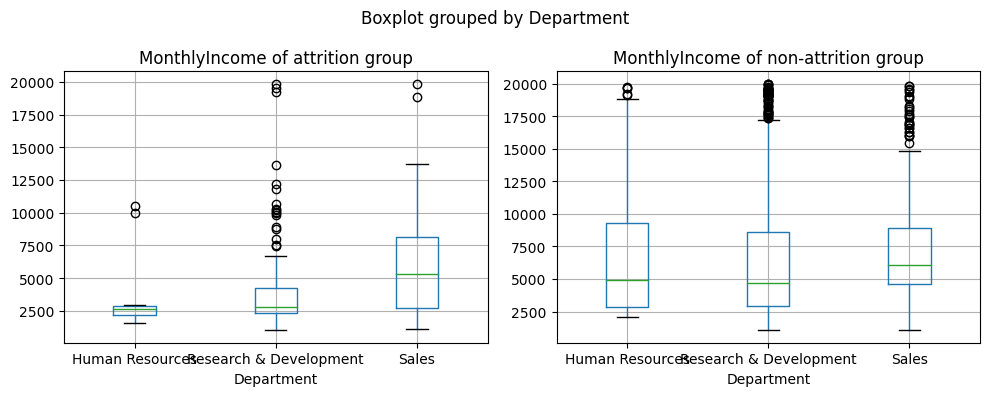

In [58]:
# Visualize 1 feature that is significant differences between department: Monthly Income
fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_box('MonthlyIncome', by='Department', ax1=ax[0], ax2=ax[1])

#### Observations:
- Monthly income of Sales department between attrition and non-attrition is relatively similar
- However monthly income of HR and R&D department is quite different between attrition and non-attrition group. Median income per month of HR and R&D employees who left are around 2,500, which is just half of the 5,000 median income for those who stayed. This indicates that monthly income is an important factor that contribute to attrition risk in HR & R&D department. Consider reviewing monthly income of HR & R&D employees , esp for hi-po talents to ensure internal equity as well as reduce attrition risk

### Summary
1. Demographic:
- Age group of 18-30 has the highest attrition.
- Job Level: Job level 1 has the highest attrition.
- Marital status: Single group has higher attrition compared to married and divorced groups
- Junior employees with <2 years of total working experience, tenure at company, in current role and with current manager tend to have higher attrition than more senior employees. This suggests that the first 2 years in company, in a specific role or with a specific manager is crucial in employee retention. More intensive employee support during the first 2 years should be considered

2. Factors that have the most impacts on likelihood of attrition are benefits related features:

** Compensation & benefits related factors:
- Employees with low stock option (level 0) are more likely to leave. Increase of 1 level in stock option for employee is associated with 82% less odds of the employee leaving. There is significant difference in stock option between those who stayed and those who left across all job levels, esp level 4 and 5. Consider reviewing stock option for employees across all job level, especially job level 4 and 5 and for hi-po talents to reduce retention risk
- For job level 4, median income per month of attrition group is lower (14,000) than non-attrition group (17,000). Consider reviewing monthly salary of job level 4, especially for hi-po talents to reduce retention risk and ensure internal equity
- Monthly income is an important factor that contribute to attrition risk in HR & R&D department. Consider reviewing monthly income of HR & R&D employees , esp for hi-po talents to ensure internal equity as well as reduce attrition risk

** Job related factors:
- Employees group who travel frequently has higher attrition compared to non-travel and travel-rarely groups
- Overtime group has 254% more odds of leaving the non-overtime group
- Employees with low level of job-involvement and job satisfaction (level 1) are more likely to leave. Increase of 1 level in job involvement for employee is associated with 77% less odds of the employee leaving, and increase of 1 level in job satisfaction for employee is associated with 60% less odds of the employee leaving 
- Employees receiving <1 training hours are more likely to leave.
- Employees who live farther from workplace are more likely to leave. This patterns are similar across almost all job levels. Consider some flexible working arrangements or commuting assistance especially for employees who live farther from the office (>10 km)

** Culture related factors:
- Employee groups with low environment satisfaction and work-life balance (level 1) are more likely to leave. Increase of 1 level in environment satisfaction for employee is associated with 62% less odds of the employee leaving
